In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import csv
# from playML.LDA import LDA
from playML.metrics import plot_decision_boundary
from playML.Bayers import BayersGN
X_train, y_train = np.loadtxt("X_train.csv", delimiter=","),np.loadtxt("y_train.csv", delimiter=",")
X_test, y_test =  np.loadtxt("X_test.csv", delimiter=","), np.loadtxt("y_test.csv", delimiter=",")

In [3]:
priors = [0.25, 0.75]

In [4]:
priors = [0.25, 0.75]
models = [
            LDA(priors = priors),
            BayersGN(priors=priors)
         ]
models = [clf.fit(X_train[:,:2], y_train) for clf in models]
scores = np.array([model.score(X_test[:,:2], y_test) for model in models])
scores

array([0.81395349, 0.88372093])

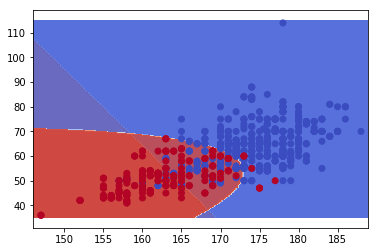

In [5]:
fig, sub = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
[plot_decision_boundary(sub, model=clf,X= X_train[:,:2],h=0.3) for clf in models]
sub.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.coolwarm)

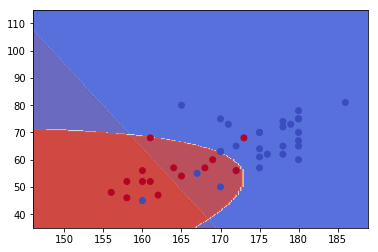

In [6]:
fig, sub = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
[plot_decision_boundary(sub, model=clf,X= X_train[:,:2],h=0.3) for clf in models]
sub.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.coolwarm)

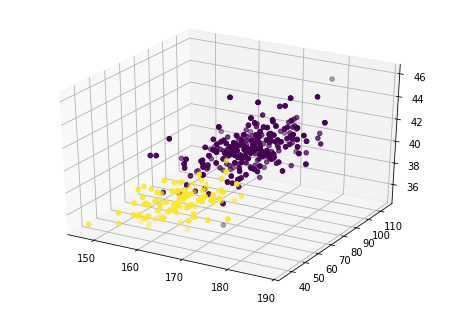

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train[:,0],X_train[:,1],X_train[:,2],c=y_train)

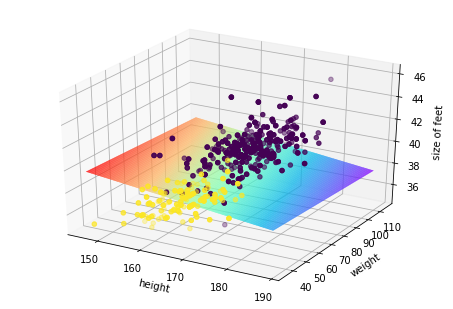

In [21]:
clf_3d =LDA(priors=[0.25,0.75])
clf_3d.fit(X_train, y_train)
labels = ["height","weight", "size of feet"]
from playML.metrics import plot_con_surface
plot_con_surface(clf_3d, X_train,y_train,labels, h=0.5)
plt.show()

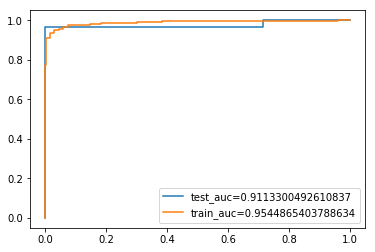

In [10]:
clf_3d =LDA(priors=[0.25,0.75])
clf_3d.fit(X_train, y_train)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
dec = clf_3d.decision_function(X_test)
pred = clf_3d.predict(X_test)
f, t, _ = roc_curve(y_test, dec)
auc = roc_auc_score(y_test,pred)

plt.plot(t, f,label="test_auc="+str(auc))
dec = clf_3d.decision_function(X_train)
f, t, _ = roc_curve(y_train, dec)
pred = clf_3d.predict(X_train)
auc = roc_auc_score(y_train,pred)
plt.plot(t, f,label="train_auc="+str(auc))
plt.legend()
plt.show()

In [14]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
one = loo.split(X_train[:,:2])
score=0
clf =LDA(priors=[0.25,0.75])
for train, test in one:
    clf.fit(X_train[train,:2], y_train[train])
    score+=clf.score(X_train[test,:2], y_train[test])
score/len(X_train)
# X_train.shape

0.8375870069605569

In [15]:
def LeaveOneOut(X, y, clf):
    """留一法"""
    score = 0
    for i in range(len(X)):
        index = np.ones(len(X), dtype=np.bool)
        index[i] = False
        clf.fit(X[index], y[index])
        score += clf.score(X[i].reshape(1,-1), y[i].reshape(1,-1))

    return score / len(X)

In [16]:
clf = LDA(priors = priors)
# from playML.metrics import LeaveOneOut
score = LeaveOneOut(X_train[:,:2], y_train, clf)
score

array([0.83758701])

In [17]:
%%time
# from playML.metrics import LeaveOneOut
score = LeaveOneOut(X_train, y_train, clf)
print(score)

[0.95939675]
CPU times: user 545 ms, sys: 0 ns, total: 545 ms
Wall time: 543 ms


In [18]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9302325581395349